┌ Warning: Non-unique fixed points found!
└ @ ChaosTools /home/hades/.julia/packages/ChaosTools/VMXUY/src/stability/fixedpoints.jl:104


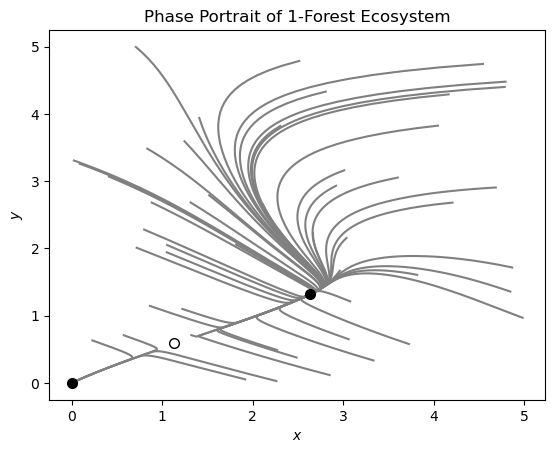

In [1]:
# Produce figure 1, phase portrait of Antonovsky model from Cantin2020
using Random
using PyPlot
using ChaosTools
using DrWatson
using Suppressor
using CSSim

params = Dict{Symbol,Any}(
        # params for single forest system
        :ρ  => 4.2, 
        :f  => 1.0,
        :h  => 2, 
        :n  => 1,

        # params required by model but not used
        :α₀ => 0, 
        :w₀ =>  0,
        :a₁ => 0, 
        :a₂ => 0.0, 
        :d  => [], 
        :l  => 0, 
        :P₀ => 0, 
        :β₁ => 0, 
        :β₂ => 0,
        :ecosystems_to_deforest => [])

# Determine number of timesteps and initial states
T = 100
n_initial_points = 50
n_states = 2

# Create initial states
rng = MersenneTwister(42)
u0s = 5*rand(rng, n_initial_points, 1, n_states);

# Numerically calculate fixed points
low = interval(0, 5)
high = interval(0, 5)
box = low × high
ds = one_forest_system(
    u0s[1, 1, :]; ρ = params[:ρ], f = params[:f], h = params[:h])

fps, eigs, stable = fixedpoints(ds, box, antonovsky_jacob)

# Iterate through initial states and create phase portrait
nrows = size(u0s)[1]
fig, ax = plt.subplots()
@suppress begin 
    for i in 1:nrows
        u0 = u0s[i, :, :]
        ds = n_forest_system(u0, params)
        trajectory_ds = trajectory(ds, T; Δt = 0.01)
        X, _ = trajectory_ds
        young_tree_density, old_tree_density = X[:, 1], X[:, 2]
        ax.plot(young_tree_density, old_tree_density, color = "grey")
    end
end 

plt.title("Phase Portrait of 1-Forest Ecosystem")
marker_kwargs = Dict(
    :markerfacecolor => "black",
    :markeredgecolor => "black",
    :marker => "o",
    :markersize => 7,
)

#ax.plot([fps[1, 1]], [fps[1, 2]]; marker_kwargs...)  # computed fixed point
ax.plot([fps[2, 1]], [fps[2, 2]]; marker_kwargs...) 
ax.set_xlabel(L"x")
ax.set_ylabel(L"y")
ax.plot( # hard coded unstable point
    [1.125], [0.60]; 
    markerfacecolor = "white", 
    markeredgecolor = "black",
    marker = "o",
    markersize = 7)
ax.plot([fps[3, 1]], [fps[3, 2]]; marker_kwargs...) 
fig 